# Projet 7
## Analyse exploratoire des données


## 1. Chargement des donnees

### 1.1 Import Libraries

In [1]:
# Libraries Standard 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssl 
import scikitplot as skplt
import re
import string
import time 
import random
from random import randrange
import os

# nltk
import nltk 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import words
from collections import Counter

# nltk téléchargements
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

# Wordcloud
from wordcloud import WordCloud

# Splitting data
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zacca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zacca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zacca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Zacca\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### 1.2 Fonctions

In [2]:
abbreviations = {}
with open('../input/abbreviations.txt', 'r') as file:
    for line in file:
        key, value = line.strip().split(':')
        abbreviations[key.strip()] = value.strip()

In [3]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

def process_tweets(tweet, norm_type='lemm'):
    """
    Prétraite les tweets en convertissant les mots d'argot et les abréviations en anglais standard,
    en éliminant les URL et en supprimant le mot "lol, amp et quot".

    Args:
        tweet (str): Le tweet à traiter.

    Returns:
        str: Tweet traité.
    """
    # Convertit le tweet en minuscules
    tweet = tweet.lower()

    # Supprime les URL
    tweet = re.sub(r'http\S+', '', tweet)

    # Supprime les caractères alphanumériques
    tweet = re.sub(r'[^a-zA-Z0-9]', ' ', tweet)

    # Supprime les balises HTML
    tweet = re.sub(r'<.*?>', ' ', tweet)

    # Supprime la ponctuation
    tweet = "".join([x for x in tweet if x not in string.punctuation])

    # Tokenisation
    tweet = tweet.split()
    if norm_type=='lemm':
        # lemmatisation
        tweet = [lemmatizer.lemmatize(x) for x in tweet if x not in stop_words]
    elif norm_type=='stemm':
        # stemmatisation 
        tweet = [stemmer.stem(x) for x in tweet if x not in stop_words]
    else:
        raise ValueError('Il faut choisir entre Lemm et Stemm')
    
    # Supprime le mot "lol"
    tweet = [word for word in tweet if word != 'lol']

    # Supprime le mot "amp"
    tweet = [word for word in tweet if word != 'amp']

    # Supprime le mot "quot"
    tweet = [word for word in tweet if word != 'quot']

    # Convertit les abréviations en anglais standard
    tweet = [abbreviations[word] if word in abbreviations else word for word in tweet]

    # Reconstitution du tweet
    tweet = " ".join(tweet)

    return tweet

In [4]:
def wordcloud_tweet(tweet):
    """
    Génère un nuage de mots pour les tweets en fonction du tweet spécifié.

    Args:
        tweet (str): Nom de la colonne contenant les tweets.

    Returns:
        None
    """
    # Calcul de la fréquence des mots traités
    all_processed_words = ' '.join(data[tweet])
    words_prc = all_processed_words.split()
    word_freq_prc = pd.Series(words_prc).value_counts()

    # Nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_processed_words)

    # Affichage du nuage de mots
    plt.figure(figsize=(15, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Nuage de mots générale')
    plt.axis('off')
    plt.show()

    # Division des df par target
    target_1_df = data[data['target'] == 1]
    target_0_df = data[data['target'] == 0]

    # Traitement du texte par cible
    all_processed_text_1 = ' '.join(target_1_df[tweet])
    all_processed_text_0 = ' '.join(target_0_df[tweet])

    # Nuage de mots pour le target 1
    wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(all_processed_text_1)
    # Nuage de mots pour le target 0
    wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(all_processed_text_0)

    plt.figure(figsize=(15, 6))

    # Premier sous-plot pour le nuage de mots du target 1
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_1, interpolation='bilinear')
    plt.title('Nuage de mots pour les tweets positifs')
    plt.axis('off')

    # Deuxième sous-plot pour le nuage de mots du target 0
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_0, interpolation='bilinear')
    plt.title('Nuage de mots pour les tweets négatifs')
    plt.axis('off')

    plt.show()


### 1.3 Import fichier

In [5]:
# Définition des noms de colonnes
column_names = ["target", "id", "date", "flag", "user", "text"]

# Import des données
data = pd.read_csv("../data/raw/training.1600000.processed.noemoticon.csv", 
                   encoding="ISO-8859-1", names=column_names)

In [6]:
# Affichage d'un échantillon de données
display(data.sample(3))

,target,id,date,flag,user,text
1284635,4,2002063351,Tue Jun 02 03:01:14 PDT 2009,NO_QUERY,ShainaW,@ashattack2 How cute is josh haha. &quot;I lo...
1193530,4,1984279713,Sun May 31 14:47:42 PDT 2009,NO_QUERY,JordanBabee,Diversity [L] I Voted Like a Hundred times 4 ...
730895,0,2263690891,Sun Jun 21 01:31:42 PDT 2009,NO_QUERY,krizellecast,I want McFlurry.


## 2. Premieres analyses

In [7]:
# contrôle valeurs uniques da la colonne target
data.target.unique()

array([0, 4], dtype=int64)

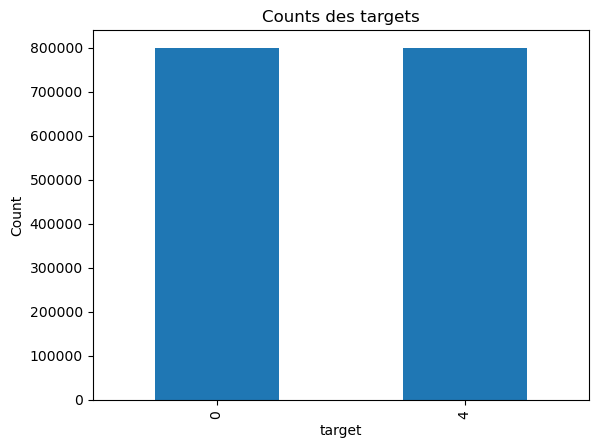

In [8]:
# creation variable target counts
target_counts = data['target'].value_counts()

# visualisation count des valeurs targets
target_counts.plot(kind='bar')
plt.xlabel('target')
plt.ylabel('Count')
plt.title('Counts des targets')
plt.show()

In [9]:
# Affichage d'un échantillon de tweets avec un target de 4
sample_target_4 = data[data['target'] == 4].sample(3)
display("Sample de 3 tweet avec target 4:")
display(sample_target_4[['target', 'text']])

'Sample de 3 tweet avec target 4:'

,target,text
1506915,4,going 2 california in the morning. gonna go ba...
1244736,4,ALL SMILES..........................!! SUP TW...
1541589,4,"done with the gardening today, good job done...."


In [10]:
# affichage d'un echantillon de tweets avec un target de 0
sample_target_0 = data[data.target == 0].sample(3)
display('Sample de 3 tweets avec target 0')
display(sample_target_0[['text','text']])

'Sample de 3 tweets avec target 0'

,text,text
220681,Having a heck of a time downloading a profile ...,Having a heck of a time downloading a profile ...
80382,Gah. Can't find a ball with big enoiugh holes....,Gah. Can't find a ball with big enoiugh holes....
18607,@FriedWontons4u failed indeed,@FriedWontons4u failed indeed


In [11]:
# Remplacement des 4 en 1 dans la colonne sentiment
data['target'] = data['target'].replace(4, 1)
# Contrôle des valeurs uniques dans la colonne sentiment
data['target'].unique()

array([0, 1], dtype=int64)

## 3. Pre-traitement text

### 3.1 Pre-Traitement avec Lemming

In [12]:
start_time = time.time()
print('debut du pretraitament avec lemming')
data['lemm_tweet'] = data['text'].apply(lambda x: process_tweets(x, norm_type='lemm'))
end_time = time.time()
print('pre-traitement termine. Temps écoulé:', round(end_time - start_time, 2), 'secondes')

debut du pretraitament avec lemming
pre-traitement termine. Temps écoulé: 53.36 secondes


### 3.2 Pre-Traitement avec Stemming

In [13]:
start_time = time.time()
print('debut du pretraitament avec lemming')
data['stemm_tweet'] = data['text'].apply(lambda x: process_tweets(x, norm_type='stemm'))
end_time = time.time()
print('pre-traitement termine. Temps écoulé:', round(end_time - start_time, 2), 'secondes')

debut du pretraitament avec lemming
pre-traitement termine. Temps écoulé: 140.64 secondes


## 4. Analyse Tweets

### 4.1 Longueur tweets par target

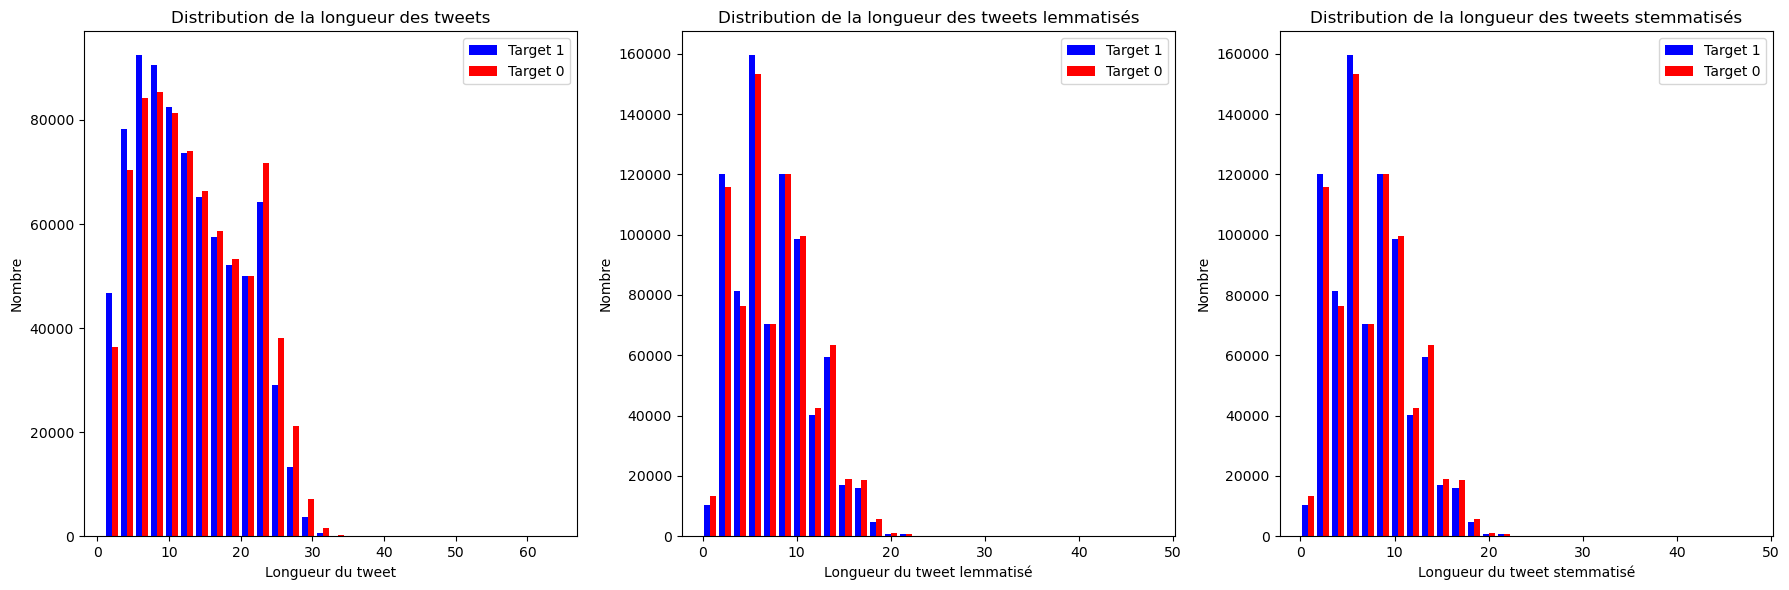

In [14]:
# Calcul de la longueur des tweets pour chaque catégorie cible
data['Tweet_Length_Target_1'] = data[data['target'] == 1]['text'].apply(lambda x: len(x.split()))
data['Tweet_Length_Target_0'] = data[data['target'] == 0]['text'].apply(lambda x: len(x.split()))

# Calcul de la longueur des tweets lemmatisés et stemmatisés
data['Lemm_Tweet_Length_Target_1'] = data[data['target'] == 1]['lemm_tweet'].apply(lambda x: len(x.split()))
data['Lemm_Tweet_Length_Target_0'] = data[data['target'] == 0]['lemm_tweet'].apply(lambda x: len(x.split()))
data['Stem_Tweet_Length_Target_1'] = data[data['target'] == 1]['stemm_tweet'].apply(lambda x: len(x.split()))
data['Stem_Tweet_Length_Target_0'] = data[data['target'] == 0]['stemm_tweet'].apply(lambda x: len(x.split()))

# Création du graphique
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graphique de la longueur des tweets
axes[0].hist([data['Tweet_Length_Target_1'], data['Tweet_Length_Target_0']], bins=30, color=['blue', 'red'], label=['Target 1', 'Target 0'])
axes[0].set_title('Distribution de la longueur des tweets')
axes[0].set_xlabel('Longueur du tweet')
axes[0].set_ylabel('Nombre')
axes[0].legend()

# Graphique de la longueur des tweets lemmatisés
axes[1].hist([data['Lemm_Tweet_Length_Target_1'], data['Lemm_Tweet_Length_Target_0']], bins=30, color=['blue', 'red'], label=['Target 1', 'Target 0'])
axes[1].set_title('Distribution de la longueur des tweets lemmatisés')
axes[1].set_xlabel('Longueur du tweet lemmatisé')
axes[1].set_ylabel('Nombre')
axes[1].legend()

# Graphique de la longueur des tweets stemmatisés
axes[2].hist([data['Stem_Tweet_Length_Target_1'], data['Stem_Tweet_Length_Target_0']], bins=30, color=['blue', 'red'], label=['Target 1', 'Target 0'])
axes[2].set_title('Distribution de la longueur des tweets stemmatisés')
axes[2].set_xlabel('Longueur du tweet stemmatisé')
axes[2].set_ylabel('Nombre')
axes[2].legend()

plt.tight_layout()
plt.show()

In [15]:
# Suppression des colonnes
columns_to_drop = ['Tweet_Length_Target_1', 'Tweet_Length_Target_0', 'Lemm_Tweet_Length_Target_1', 'Lemm_Tweet_Length_Target_0', 'Stem_Tweet_Length_Target_1', 'Stem_Tweet_Length_Target_0']
data.drop(columns=columns_to_drop, inplace=True)

### 4.2 Frequences paroles

In [16]:
# Calcul de la fréquence des mots traités
all_processed_words = ' '.join(data['text'])
words_prc = all_processed_words.split()
word_freq_prc = pd.Series(words_prc).value_counts()

# Calcul de la fréquence des mots traités
all_processed_words_stem = ' '.join(data['stemm_tweet'])
words_prc_stem = all_processed_words_stem.split()
word_freq_prc_stem = pd.Series(words_prc_stem).value_counts()

# Calcul de la fréquence des mots traités
all_processed_words_lem = ' '.join(data['lemm_tweet'])
words_prc_lem = all_processed_words_lem.split()
word_freq_prc_lem = pd.Series(words_prc_lem).value_counts()

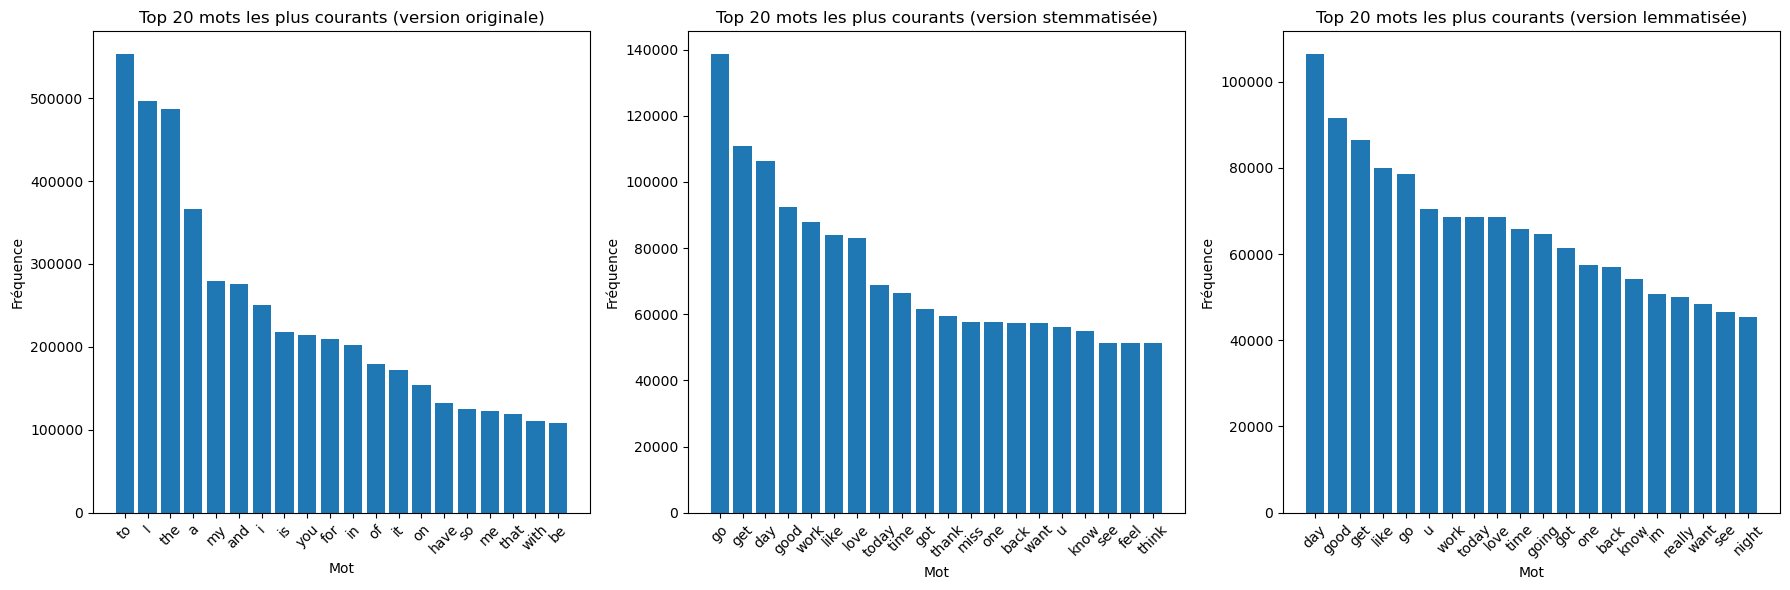

In [17]:
# Création du graphique avec 3 sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graphique des 20 mots les plus courants (version originale)
axes[0].bar(word_freq_prc.head(20).index, word_freq_prc.head(20).values)
axes[0].set_title('Top 20 mots les plus courants (version originale)')
axes[0].set_xlabel('Mot')
axes[0].set_ylabel('Fréquence')
axes[0].tick_params(axis='x', rotation=45)

# Graphique des 20 mots les plus courants (version stemmatisée)
axes[1].bar(word_freq_prc_stem.head(20).index, word_freq_prc_stem.head(20).values)
axes[1].set_title('Top 20 mots les plus courants (version stemmatisée)')
axes[1].set_xlabel('Mot')
axes[1].set_ylabel('Fréquence')
axes[1].tick_params(axis='x', rotation=45)

# Graphique des 20 mots les plus courants (version lemmatisée)
axes[2].bar(word_freq_prc_lem.head(20).index, word_freq_prc_lem.head(20).values)
axes[2].set_title('Top 20 mots les plus courants (version lemmatisée)')
axes[2].set_xlabel('Mot')
axes[2].set_ylabel('Fréquence')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.3 WordCloud

### 4.3.1 Analyse texte normale

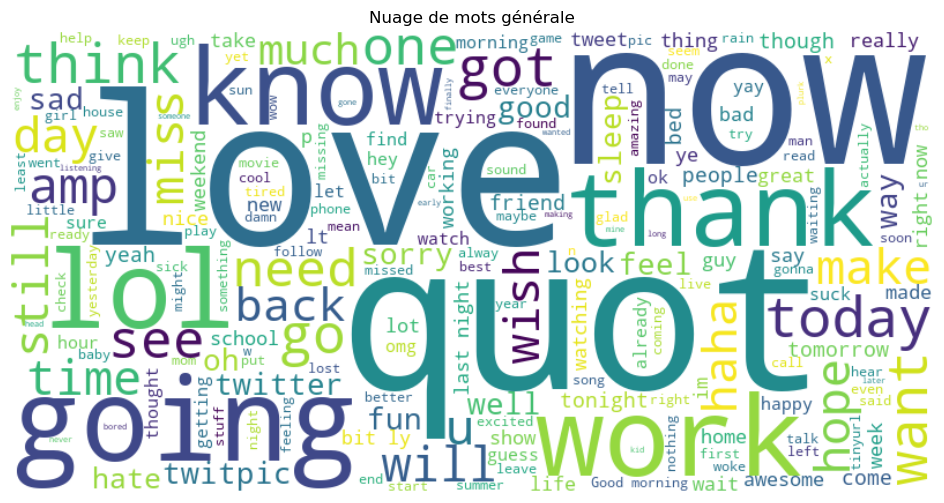

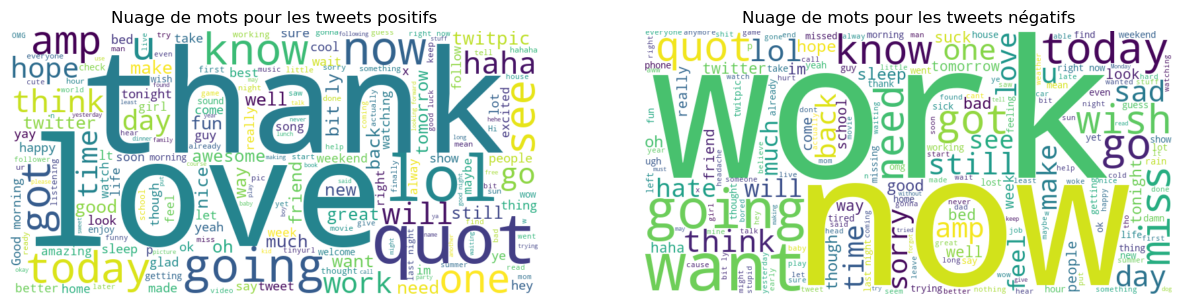

In [18]:
wordcloud_tweet('text')

### 4.3.2 Analyse texte lemmatisations

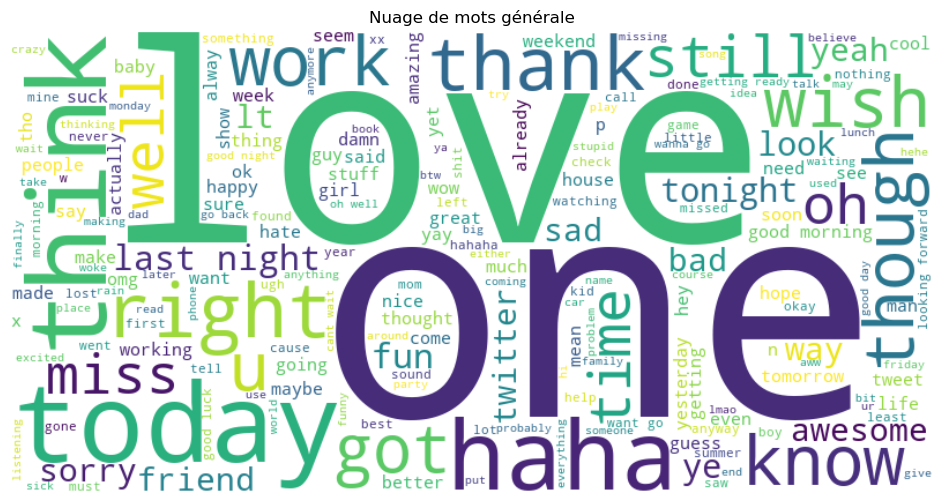

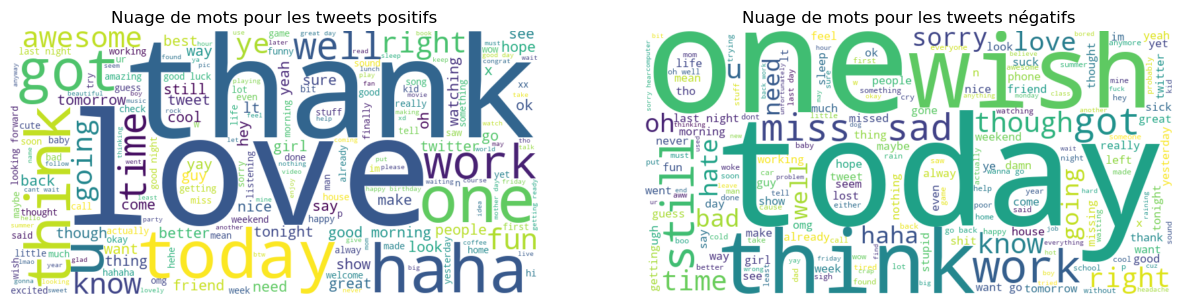

In [19]:
wordcloud_tweet('lemm_tweet')

### 4.3.3 Analyse texte stemmatisations

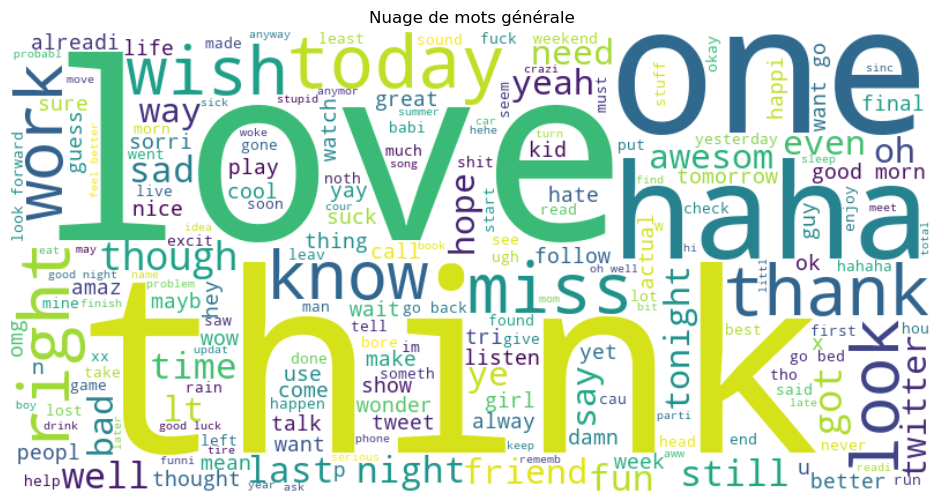

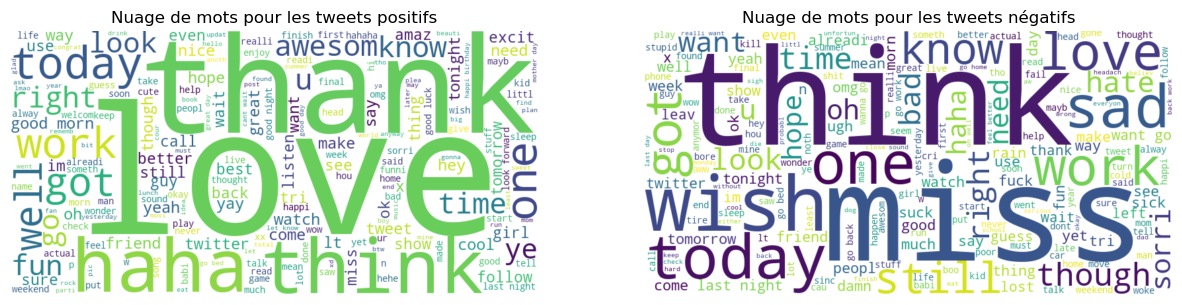

In [20]:
wordcloud_tweet('stemm_tweet')

## 5. Preparation df

### 5.1 Sauvegarde donnees

In [21]:
# definition save path
save_path = "../data/processed/"

In [24]:
# drop des colonnes 
data.drop(columns=['lemm_tweet', 'stemm_tweet'], inplace=True)

In [25]:
# sauvegarde des donnees
data.to_csv(os.path.join(save_path, "data.csv"), index=False)
